In [ ]:
!pip install qutip --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 63.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
from qutip import Qobj
from qutip import mesolve
from qutip import basis
from qutip import expect
from qutip import projection

# Define the Hamiltonian from the table
H_S = np.array([
    [1, 0, -13, 0, -2, -1, 5, -1],
    [0, 388, -41, 4, 1, 1, -4, 1],
    [-13, -41, 342, 2, 0, 1, -6, 1],
    [0, 4, 2, 207, -4, 6, -59, -1],
    [-2, 1, 0, -4, 57, 21, 2, 11],
    [-1, 1, 1, 6, 21, 102, 5, -51],
    [5, -4, -6, -59, 2, 5, 248, 3],
    [-1, 1, 1, -1, 11, -51, 3, 0]
])

# Convert the Hamiltonian to a QuTiP object
H_S = Qobj(H_S)

In [ ]:
from qutip import destroy

N = 8  # number of sites
gamma = 50  # decay rate in cm^-1

# Create a list of collapse operators
c_ops = [np.sqrt(gamma)* destroy(N) for _ in range(N)]
#c_ops = [gamma * destroy(N) for _ in range(N)]

In [ ]:
# Define your time points here
tlist = np.linspace(0, 1000, 500)  # for example, from 0 to 2000 in 1000 steps


In [ ]:
# Create the initial state
initial_site = 0
psi0 = basis(N, initial_site)

In [ ]:
'''
# Define the site that is initially excited (0-indexed)
initial_site = 0 # for Trp1

# Create the initial state
#psi0 = basis(N, initial_site)
# Define the parameters
lambda_0 = 0.0035
psi_0 = 0.002
phi_0 = 0.002
K = 0.71 * np.pi
K_0 = 0.55 * np.pi
N = 8  # number of sites

# Calculate the values of psi_n for each site
psi_n = np.array([psi_0 * (1 + 0.01 * np.exp(1j * K * n)) * np.exp(1j * K_0 * n) for n in range(N)])

# Create the initial state
psi0 = Qobj(psi_n)
'''

'\n# Define the site that is initially excited (0-indexed)\ninitial_site = 0 # for Trp1\n\n# Create the initial state\n#psi0 = basis(N, initial_site)\n# Define the parameters\nlambda_0 = 0.0035\npsi_0 = 0.002\nphi_0 = 0.002\nK = 0.71 * np.pi\nK_0 = 0.55 * np.pi\nN = 8  # number of sites\n\n# Calculate the values of psi_n for each site\npsi_n = np.array([psi_0 * (1 + 0.01 * np.exp(1j * K * n)) * np.exp(1j * K_0 * n) for n in range(N)])\n\n# Create the initial state\npsi0 = Qobj(psi_n)\n'

In [ ]:
from qutip import Options

# Define the solver options
options = Options(nsteps=100000,method='adams')

# Solve the master equation with the new options
result = mesolve(H_S, psi0, tlist, c_ops, options=options)

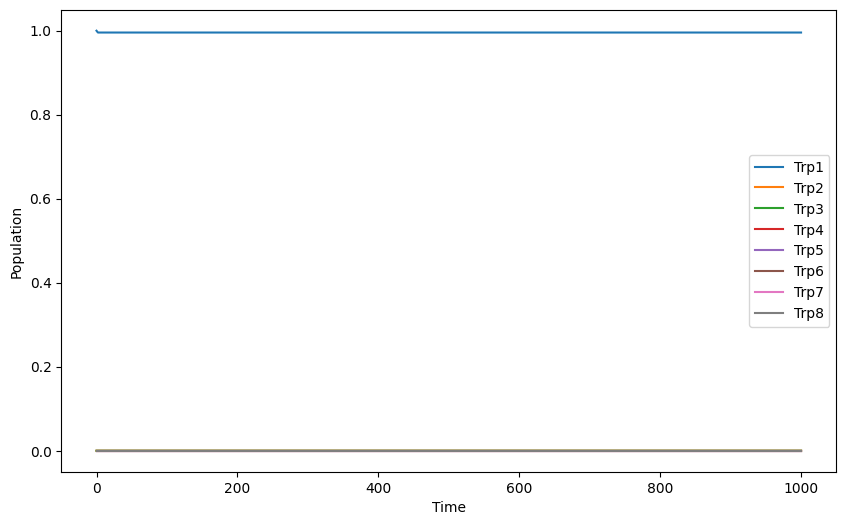

In [ ]:
import matplotlib.pyplot as plt

# Extract the populations (probabilities) of each state at each time point
populations = np.array([abs(state.full().diagonal())**2 for state in result.states])

# Plot the populations
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(tlist, populations[:, i], label=f'Trp{i+1}')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()


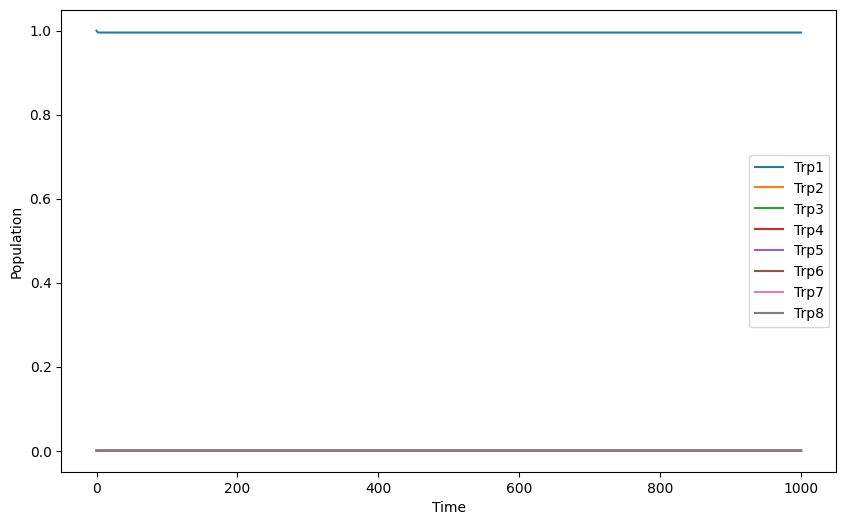

In [ ]:
from qutip import ket, bra

# Define the projection operators for each site
projection_operators = [ket([i], dim=N) * bra([i], dim=N) for i in range(N)]

# Extract the populations (probabilities) of each state at each time point
populations = np.array([[abs((state.dag() * proj * state).full()[0, 0]) for proj in projection_operators] for state in result.states])
# Plot the populations
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(tlist, populations[:, i], label=f'Trp{i+1}')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()
